<h1 style="text-align:center">Deep Learning   </h1>
<h1 style="text-align:center"> Lab Session 2 - 3 Hours </h1>
<h1 style="text-align:center"> Convolutional Neural Network (CNN) for Handwritten Digits Recognition</h1>

<b> Student 1:</b> # Di HAO  
<b> Student 2:</b> # Chin-te LIAO
 
 
The aim of this session is to practice with Convolutional Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 


Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an pdf document using print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by May 29th 2017.

Send you pdf file to benoit.huet@eurecom.fr and olfa.ben-ahmed@eurecom.fr using **[DeepLearning_lab2]** as Subject of your email.

# Introduction

In the last Lab Session, you built a Multilayer Perceptron for recognizing hand-written digits from the MNIST data-set. The best achieved accuracy on testing data was about 97%.  Can  you do better than these results using a deep CNN ?
In this Lab Session, you will build, train and optimize in TensorFlow one of the early Convolutional Neural Networks:  **LeNet-5** to go to  more than 99% of accuracy. 






# Load MNIST Data in TensorFlow
Run the cell above to load the MNIST data that comes  with TensorFlow. You will use this data in **Section 1** and **Section 2**.

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Image Shape: (784,)
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


# Section 1 : My First Model in TensorFlow

Before starting with CNN, let's train and test in TensorFlow the example :
**y=softmax(Wx+b)** seen in the DeepLearing course last week. 

This model reaches an accuracy of about 92 %.
You will also learn how to launch the tensorBoard https://www.tensorflow.org/get_started/summaries_and_tensorboard to  visualize the computation graph, statistics and learning curves. 

<b> Part 1 </b> : Read carefully the code in the cell below. Run it to perform training. 

In [2]:
from __future__ import print_function
import tensorflow as tf


#STEP 1

# Parameters
learning_rate = 0.01
training_epochs = 100
batch_size = 128
display_step = 1
logs_path = 'hao/'  # useful for tensorboard

# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


#STEP 2 


# Launch the graph for training
with tf.Session() as sess:
    sess.run(init)
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")
    

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))




Epoch:  01   =====> Loss= 1.286880517
Epoch:  02   =====> Loss= 0.732041219
Epoch:  03   =====> Loss= 0.600195985
Epoch:  04   =====> Loss= 0.536342536
Epoch:  05   =====> Loss= 0.497956930
Epoch:  06   =====> Loss= 0.471096011
Epoch:  07   =====> Loss= 0.451236956
Epoch:  08   =====> Loss= 0.435944057
Epoch:  09   =====> Loss= 0.423520114
Epoch:  10   =====> Loss= 0.412619309
Epoch:  11   =====> Loss= 0.404238402
Epoch:  12   =====> Loss= 0.396902045
Epoch:  13   =====> Loss= 0.390285460
Epoch:  14   =====> Loss= 0.384378107
Epoch:  15   =====> Loss= 0.379215165
Epoch:  16   =====> Loss= 0.374362347
Epoch:  17   =====> Loss= 0.370468091
Epoch:  18   =====> Loss= 0.366602908
Epoch:  19   =====> Loss= 0.362801222
Epoch:  20   =====> Loss= 0.359706557
Epoch:  21   =====> Loss= 0.356791474
Epoch:  22   =====> Loss= 0.353846991
Epoch:  23   =====> Loss= 0.351198349
Epoch:  24   =====> Loss= 0.348782285
Epoch:  25   =====> Loss= 0.346459246
Epoch:  26   =====> Loss= 0.344178767
Epoch:  27  

<b> Part 2  </b>: Using Tensorboard, we can  now visualize the created graph, giving you an overview of your architecture and how all of the major components  are connected. You can also see and analyse the learning curves. 

To launch tensorBoard: 
- Go to the **TP2** folder, 
- Open a Terminal and run the command line **"tensorboard --logdir= log_files/"**, it will generate an http link ,ex http://666.6.6.6:6006,
- Copy this  link into your web browser 


Enjoy It !! 


# Section 2 : The 99% MNIST Challenge !

<b> Part 1 </b> : LeNet5 implementation

One you are now familar with **tensorFlow** and **tensorBoard**, you are in this section to build, train and test the baseline [LeNet-5](http://yann.lecun.com/exdb/lenet/)  model for the MNIST digits recognition problem.  

In more advanced step you will make some optimizations to get more than 99% of accuracy. The best model can get to over 99.7% accuracy! 

For more information, have a look at this list of results : http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

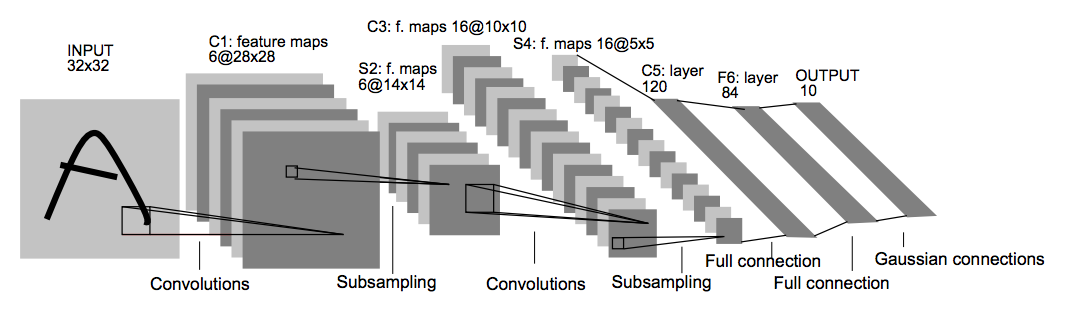

In [29]:
from IPython.display import Image
Image(filename='lenet.png')







The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

--------------------------
**Layer 1: Convolutional.** The output shape should be 28x28x6 **Activation.** sigmoid **Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16. **Activation.** sigmoid **Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.  You may need to use **flatten*  from tensorflow.contrib.layers import flatten

**Layer 3: Fully Connected.** This should have 120 outputs. **Activation.** sigmoid

**Layer 4: Fully Connected.** This should have 84 outputs. **Activation.**sigmoid

**Layer 5: Fully Connected.** This should have 10 outputs.**Activation.**softmax


<b> Question 2.1.1 </b>  Implement the Neural Network architecture described above.
For that, your will use classes and functions from  https://www.tensorflow.org/api_docs/python/tf/nn. 

We give you some helper functions for weigths and bias initilization. Also you can refer to section 1. 


In [2]:
#Helper functions  for weigths and bias initilization 



def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)




In [3]:
logs_path = 'hao/'  # useful for tensorboard

# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
def LeNet5_Model(data):    
    # your inmplementation goes here
    x_image = tf.reshape(data, [-1, 28, 28, 1])
    #layer1
    W_conv1 = weight_variable([5,5,1,6]) # patch 5x5, in size 1, out size 32
    b_conv1 = bias_variable([6])
    conv1 = tf.nn.conv2d(x_image,W_conv1,strides = [1,1,1,1],padding='SAME')
    pool1=tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    output1=tf.sigmoid(pool1+b_conv1)
    #layer2
    W_conv2 = weight_variable([5,5,6,16]) # patch 5x5, in size 32, out size 64
    b_conv2 = bias_variable([16])
    conv2 = tf.nn.conv2d(output1,W_conv2,strides = [1,1,1,1],padding='VALID')
    pool2=tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    output2=tf.sigmoid(pool2+b_conv2)
    #layer3
    flat3=tf.contrib.layers.flatten(output2)
    W1 = weight_variable([400,120])
    b1 = bias_variable([120])
    y1 = tf.sigmoid(tf.matmul(flat3, W1) + b1)

    #layer4
    W2 = weight_variable([120, 84])
    b2 = bias_variable([84])
    y2 = tf.sigmoid(tf.matmul(y1, W2) + b2)
    #layer5
    W3 = weight_variable([84, 10])
    b3 = bias_variable([10])
    model = tf.nn.softmax(tf.matmul(y2, W3) + b3)
    return model 




<b> Question 2.1.2. </b>  Calculate the number of parameters of this model 

<div class="alert alert-info">  
For the first convolution layer, we need 5*5*1*6=150 for the weight,and 6 for the bias, in total 156.  
For the second convolution layer, we need 5*5*6*16=2400 for the weight, and 16 for the bias, in total 2416.  
For the third layer, which is the first layer of the neuron network,we need 400*120=48000 for the weight, and 120 for the bias, in total 48120.  
For the fourth layer, which is the second layer of the neuron network, we need 120*84=10080 for the weight, and 84 for the bias, in total 10164.
For the fifth layer, we need 84*10=840 for the weight and 10 for the bias, in total 850.  
The parameter of this model is 156+2416+48120+10164+850=61706
</div> 

<b> Question 2.1.3. </b>  Start the training with the parameters cited below:

     Learning rate =0.1
     Loss Fucntion : Cross entropy
     Optimisateur: SGD
     Number of training iterations= 10000
     The batch size =128

In [4]:
# Training parameters 
learning_rate = 0.1
training_epochs = 100
batch_size = 128
display_step = 1
#Your implementation goes here

<b> Question 2.1.4. </b>  Implement the evaluation function for accuracy computation 

In [3]:
def evaluate(model, y):
    #your implementation goes here
    acc = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    return acc

<b> Question 2.1.5. </b>  Implement training pipeline and run the training data through it to train the model.

- Before each epoch, shuffle the training set. 
- Print the loss per mini batch and the training/validation accuracy per epoch. (Display results every 100 epochs)
- Save the model after training
- Print after training the final testing accuracy 



In [6]:
from __future__ import print_function
from sklearn.utils import shuffle
# Initializing the variables
def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
    with tf.name_scope('SGD'):
        # Gradient Descent
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model1.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))



        print ("Training Finished!")

   #Your implementation for testing accuracy after training goes here
    

<b> Question 2.1.6 </b> : Use tensorBoard to visualise and save the LeNet5 Graph and all learning curves. 
Save all obtained figures in the folder **"TP2/MNIST_99_Challenge_Figures"**

In [7]:
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)

Start Training!
Epoch:  01   =====> Loss= 2.306161346   =====> ValidationAccuracy= 0.109999999 0.11
Epoch:  02   =====> Loss= 2.305824125   =====> ValidationAccuracy= 0.095799997 0.1126
Epoch:  03   =====> Loss= 2.305161276   =====> ValidationAccuracy= 0.098999999 0.099
Epoch:  04   =====> Loss= 2.304219128   =====> ValidationAccuracy= 0.188999996 0.1126
Epoch:  05   =====> Loss= 2.303692152   =====> ValidationAccuracy= 0.112599999 0.1126
Epoch:  06   =====> Loss= 2.301792309   =====> ValidationAccuracy= 0.109999999 0.11
Epoch:  07   =====> Loss= 2.298127002   =====> ValidationAccuracy= 0.112599999 0.1126
Epoch:  08   =====> Loss= 2.287678572   =====> ValidationAccuracy= 0.114600003 0.1278
Epoch:  09   =====> Loss= 2.177810967   =====> ValidationAccuracy= 0.357600003 0.392
Epoch:  10   =====> Loss= 1.527677958   =====> ValidationAccuracy= 0.649800003 0.6598
Epoch:  11   =====> Loss= 0.868956327   =====> ValidationAccuracy= 0.798600018 0.8016
Epoch:  12   =====> Loss= 0.587383359   ====

The link of the tensorboard is :
http://192.168.17.2:6006/
#  insert your obtained figure here 

**Image Accuracy:**

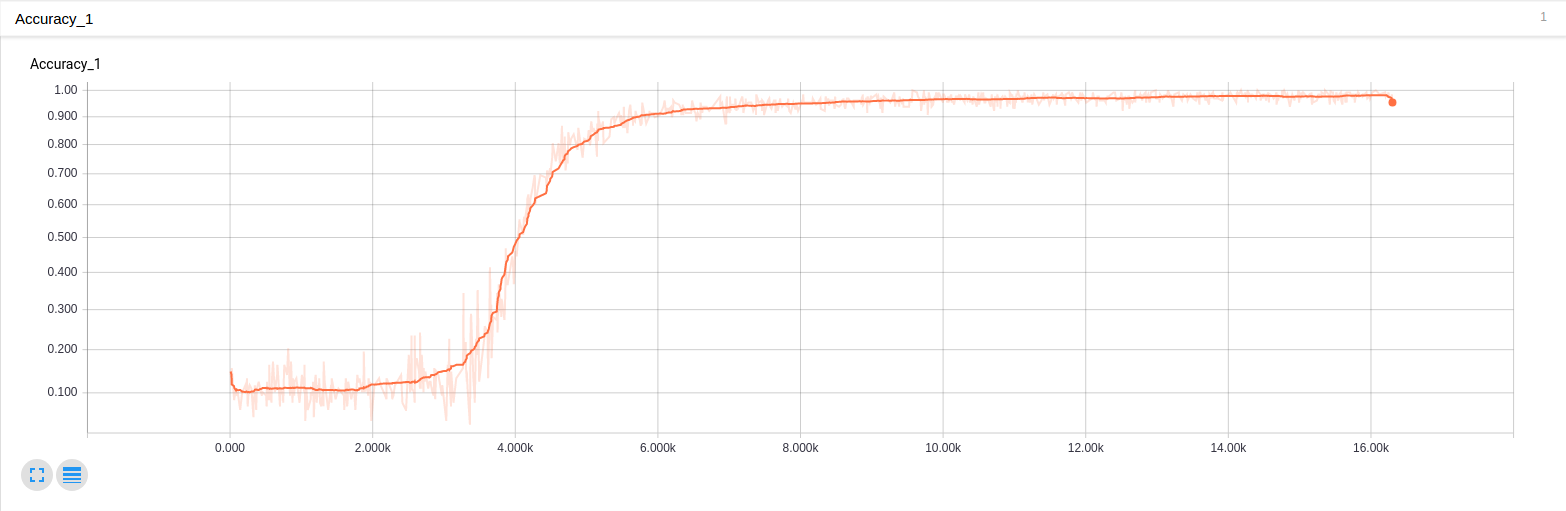

In [25]:
from IPython.display import Image
Image(filename='./MNIST_99_Challenge_Figures/accuracy.png') 

<div class="alert alert-info">  From the graph, we can see the accuracy vibrate a little bit, increasing slowly at the begining, and becomes fast between 3k and 5k, and then slows down.  
</div>

**Image loss:**

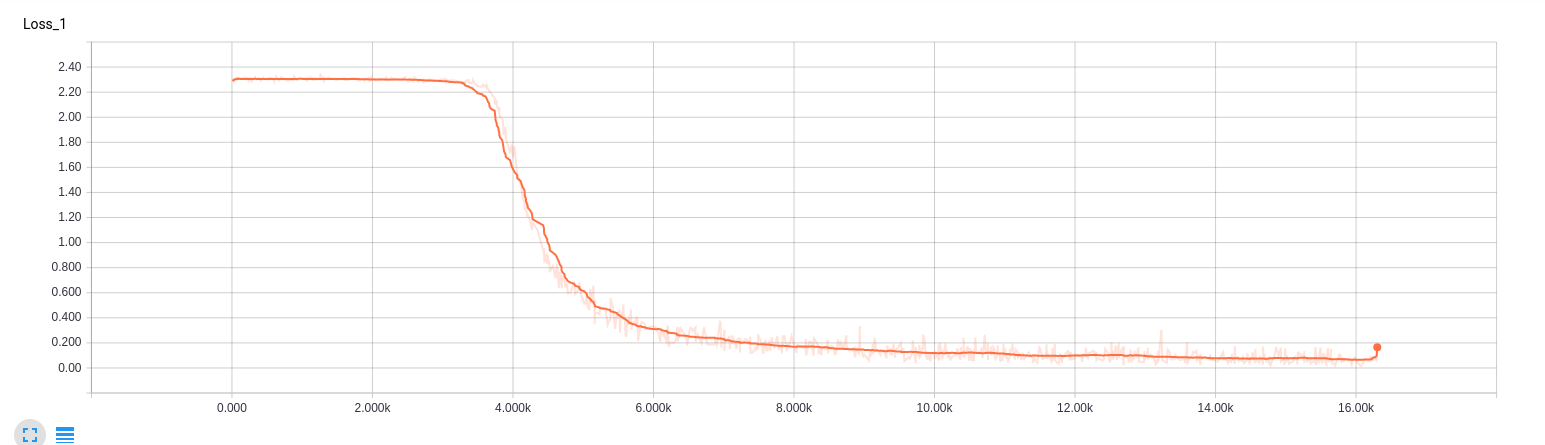

In [26]:
from IPython.display import Image
Image(filename='./MNIST_99_Challenge_Figures/loss.png')

<div class="alert alert-info">  From the graph, we can see the loss decreases in the same pace with accuracy.  
</div>

**Totalgraph:**

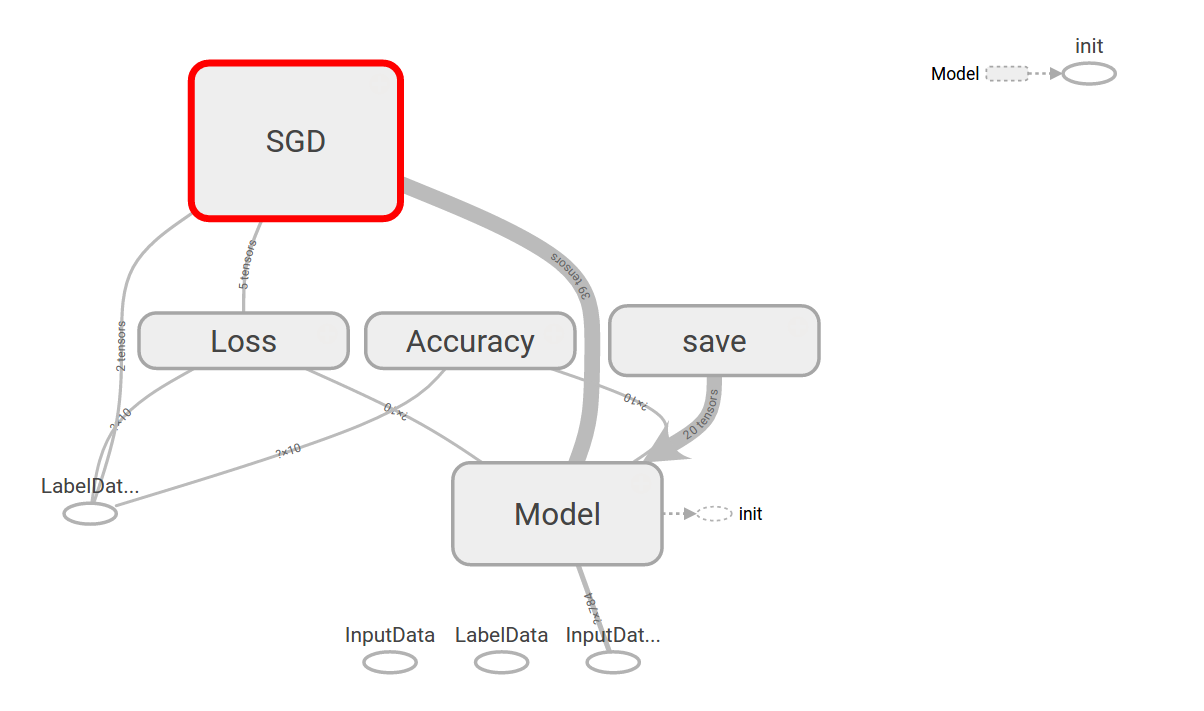

In [27]:
from IPython.display import Image
Image(filename='./MNIST_99_Challenge_Figures/totalgraph.png')

<div class="alert alert-info">  From the graph, we can see how the data move.  
</div>

**Image model:**


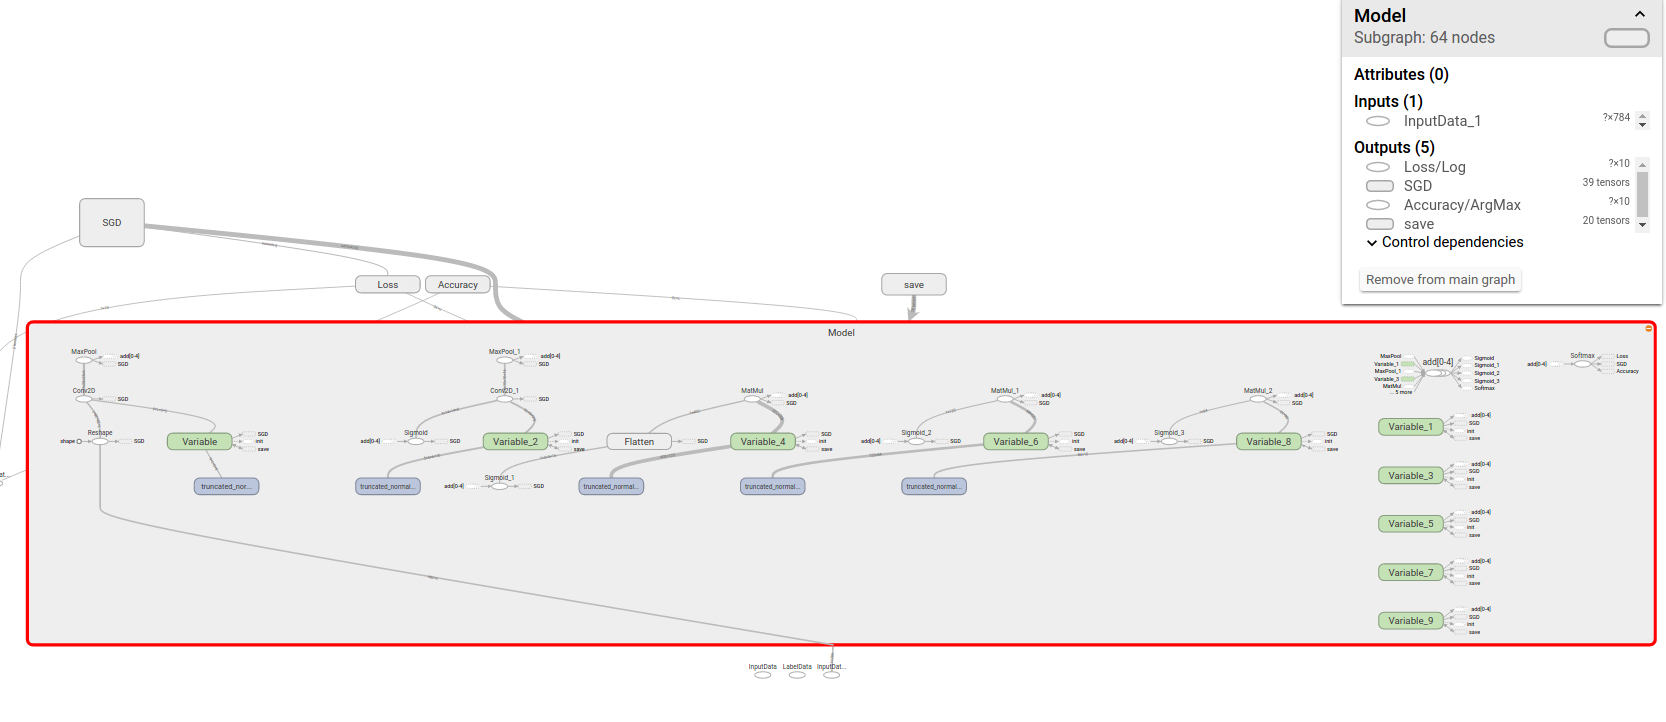

In [28]:
from IPython.display import Image
Image(filename='./MNIST_99_Challenge_Figures/model.png')

<div class="alert alert-info">  In the model graph, we can see the details of the model.  
</div>

<b> Part 2 </b> : LeNET 5 Optimization


<b> Question 2.2.1 </b>  Change the sigmoid function with a Relu :

- Retrain your network with SGD and AdamOptimizer 



- Try with different learning rates for each Optimizer (0.0001 and 0.001 ) and different Batch sizes (50 and 128) for 20000 Epochs. 

- For each optimizer, plot (on the same curve) the **testing accuracies** function to **(learning rate, batch size)** 



- Did you reach the 99% accuracy ? What are the optimal parametres that gave you the best results? 








<div class="alert alert-info">  Change the sigmoid function with a Relu,Optimisateur: SGD.
</div>

In [4]:
# Training parameters 
learning_rate = 0.1
training_epochs = 50
batch_size = 128
display_step = 1
#Your implementation goes here
# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
def LeNet5_Model(data):    
    # your inmplementation goes here
    x_image = tf.reshape(data, [-1, 28, 28, 1])
    #layer1
    W_conv1 = weight_variable([5,5,1,6]) # patch 5x5, in size 1, out size 32
    b_conv1 = bias_variable([6])
    conv1 = tf.nn.conv2d(x_image,W_conv1,strides = [1,1,1,1],padding='SAME')
    pool1=tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    output1=tf.nn.relu(pool1+b_conv1)
    #layer2
    W_conv2 = weight_variable([5,5,6,16]) # patch 5x5, in size 32, out size 64
    b_conv2 = bias_variable([16])
    conv2 = tf.nn.conv2d(output1,W_conv2,strides = [1,1,1,1],padding='VALID')
    pool2=tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    output2=tf.nn.relu(pool2+b_conv2)
    #layer3
    flat3=tf.contrib.layers.flatten(output2)
    W1 = weight_variable([400,120])
    b1 = bias_variable([120])
    y1 = tf.nn.relu(tf.matmul(flat3, W1) + b1)

    #layer4
    W2 = weight_variable([120, 84])
    b2 = bias_variable([84])
    y2 = tf.nn.relu(tf.matmul(y1, W2) + b2)
    #layer5
    W3 = weight_variable([84, 10])
    b3 = bias_variable([10])
    model = tf.nn.softmax(tf.matmul(y2, W3) + b3)
    return model 
from __future__ import print_function
from sklearn.utils import shuffle
# Initializing the variables
def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred+1), reduction_indices=1))
    with tf.name_scope('SGD'):
        # Gradient Descent
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model2.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))



        print ("Training Finished!")
        
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)



Start Training!
Epoch:  01   =====> Loss= -0.403381667   =====> ValidationAccuracy= 0.829200029 0.836
Epoch:  02   =====> Loss= -0.575081394   =====> ValidationAccuracy= 0.860000014 0.8612
Epoch:  03   =====> Loss= -0.589225958   =====> ValidationAccuracy= 0.866999984 0.8726
Epoch:  04   =====> Loss= -0.596469378   =====> ValidationAccuracy= 0.878400028 0.8804
Epoch:  05   =====> Loss= -0.602246545   =====> ValidationAccuracy= 0.883400023 0.8848
Epoch:  06   =====> Loss= -0.605950778   =====> ValidationAccuracy= 0.884199977 0.8862
Epoch:  07   =====> Loss= -0.608480366   =====> ValidationAccuracy= 0.888000011 0.8898
Epoch:  08   =====> Loss= -0.610271343   =====> ValidationAccuracy= 0.890999973 0.8914
Epoch:  09   =====> Loss= -0.614158707   =====> ValidationAccuracy= 0.952199996 0.9554
Epoch:  10   =====> Loss= -0.664713853   =====> ValidationAccuracy= 0.969399989 0.9732
Epoch:  11   =====> Loss= -0.670894346   =====> ValidationAccuracy= 0.975199997 0.9766
Epoch:  12   =====> Loss= -0

<div class="alert alert-info">  Change the sigmoid function with a Relu,Optimisateur:  AdamOptimizer .
</div>

In [5]:
from __future__ import print_function
from sklearn.utils import shuffle
learning_rate = 0.1
training_epochs = 50
batch_size = 128
display_step = 1
#Your implementation goes here
# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
def LeNet5_Model(data):    
    # your inmplementation goes here
    x_image = tf.reshape(data, [-1, 28, 28, 1])
    #layer1
    W_conv1 = weight_variable([5,5,1,6]) # patch 5x5, in size 1, out size 32
    b_conv1 = bias_variable([6])
    conv1 = tf.nn.conv2d(x_image,W_conv1,strides = [1,1,1,1],padding='SAME')
    pool1=tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    output1=tf.nn.relu(pool1+b_conv1)
    #layer2
    W_conv2 = weight_variable([5,5,6,16]) # patch 5x5, in size 32, out size 64
    b_conv2 = bias_variable([16])
    conv2 = tf.nn.conv2d(output1,W_conv2,strides = [1,1,1,1],padding='VALID')
    pool2=tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    output2=tf.nn.relu(pool2+b_conv2)
    #layer3
    flat3=tf.contrib.layers.flatten(output2)
    W1 = weight_variable([400,120])
    b1 = bias_variable([120])
    y1 = tf.nn.relu(tf.matmul(flat3, W1) + b1)

    #layer4
    W2 = weight_variable([120, 84])
    b2 = bias_variable([84])
    y2 = tf.nn.relu(tf.matmul(y1, W2) + b2)
    #layer5
    W3 = weight_variable([84, 10])
    b3 = bias_variable([10])
    model = tf.nn.softmax(tf.matmul(y2, W3) + b3)
    return model 

In [7]:
def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred+1), reduction_indices=1))
    with tf.name_scope('AdamOptimizer'):
        # Gradient Descent
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model3.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))



        print ("Training Finished!")
        
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)

Start Training!
Epoch:  01   =====> Loss= -0.066889182   =====> ValidationAccuracy= 0.107000001 0.107
Epoch:  02   =====> Loss= -0.066888602   =====> ValidationAccuracy= 0.107000001 0.107
Epoch:  03   =====> Loss= -0.066888602   =====> ValidationAccuracy= 0.107000001 0.107
Epoch:  04   =====> Loss= -0.066875979   =====> ValidationAccuracy= 0.107000001 0.107
Epoch:  05   =====> Loss= -0.066875979   =====> ValidationAccuracy= 0.107000001 0.107
Epoch:  06   =====> Loss= -0.066939094   =====> ValidationAccuracy= 0.107000001 0.107
Epoch:  07   =====> Loss= -0.066838111   =====> ValidationAccuracy= 0.107000001 0.107
Epoch:  08   =====> Loss= -0.066926471   =====> ValidationAccuracy= 0.107000001 0.107
Epoch:  09   =====> Loss= -0.066875980   =====> ValidationAccuracy= 0.107000001 0.107
Epoch:  10   =====> Loss= -0.066901225   =====> ValidationAccuracy= 0.107000001 0.107
Epoch:  11   =====> Loss= -0.066888602   =====> ValidationAccuracy= 0.107000001 0.107
Epoch:  12   =====> Loss= -0.066901225

| Optimizer            |  Gradient Descent         |AdamOptimizer |
| -------------        |: -------------: |: ---------:   
| Validation Accuracy  | 0.9878        | 0.107 |      
| Testing Accuracy     | 0.9865        | 0.0982|       
| Training Time        | 1040.29758501 | 1051.20988202|  |  


<div class="alert alert-info"> From the table, we can see the accuracy of AdamOptimizer is very low, that is because the loss doesn't converge in the training process.We think that is because the 0.1 learning rate is too large for AdamOptimizer,which can't decrease the loss. In the following models with lower learning rate, AdamOptimizer gets quite good results.
</div>

<div class="alert alert-info">  learning_rate : 0.0001,batch_size = 128,Optimisateur: SGD
</div>

In [5]:
# your answer goas here
logs_path = 'hao/'  # useful for tensorboard
learning_rate = 0.0001
training_epochs = 50
batch_size = 128
display_step = 1

def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
    with tf.name_scope('SGD'):
        # Gradient Descent
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model4.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))



        print ("Training Finished!")
        
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)

   #Your implementation for testing accuracy after training goes here

Start Training!
Epoch:  01   =====> Loss= 2.308766656   =====> ValidationAccuracy= 0.098200001 0.0982
Epoch:  02   =====> Loss= 2.302533778   =====> ValidationAccuracy= 0.098999999 0.099
Epoch:  03   =====> Loss= 2.296855245   =====> ValidationAccuracy= 0.099799998 0.0998
Epoch:  04   =====> Loss= 2.291395236   =====> ValidationAccuracy= 0.102600001 0.1026
Epoch:  05   =====> Loss= 2.286031875   =====> ValidationAccuracy= 0.109600000 0.1096
Epoch:  06   =====> Loss= 2.280769134   =====> ValidationAccuracy= 0.114799999 0.1148
Epoch:  07   =====> Loss= 2.275511026   =====> ValidationAccuracy= 0.119999997 0.12
Epoch:  08   =====> Loss= 2.270217915   =====> ValidationAccuracy= 0.127200007 0.1272
Epoch:  09   =====> Loss= 2.264894226   =====> ValidationAccuracy= 0.138799995 0.1388
Epoch:  10   =====> Loss= 2.259437752   =====> ValidationAccuracy= 0.150000006 0.15
Epoch:  11   =====> Loss= 2.253814016   =====> ValidationAccuracy= 0.158999994 0.159
Epoch:  12   =====> Loss= 2.247963044   ====

<div class="alert alert-info">  learning_rate : 0.001,batch_size = 128,Optimisateur: SGD
</div>

In [5]:

def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
    with tf.name_scope('SGD'):
        # Gradient Descent
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model5.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))



        print ("Training Finished!")
learning_rate = 0.001
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)

Start Training!
Epoch:  01   =====> Loss= 2.280019027   =====> ValidationAccuracy= 0.250400007 0.2506
Epoch:  02   =====> Loss= 2.195093185   =====> ValidationAccuracy= 0.443399996 0.4438
Epoch:  03   =====> Loss= 2.033940159   =====> ValidationAccuracy= 0.575399995 0.5758
Epoch:  04   =====> Loss= 1.650968108   =====> ValidationAccuracy= 0.695200026 0.6958
Epoch:  05   =====> Loss= 1.103455174   =====> ValidationAccuracy= 0.777400017 0.7778
Epoch:  06   =====> Loss= 0.760602874   =====> ValidationAccuracy= 0.819800019 0.8204
Epoch:  07   =====> Loss= 0.599214330   =====> ValidationAccuracy= 0.847199976 0.8472
Epoch:  08   =====> Loss= 0.512595872   =====> ValidationAccuracy= 0.863799989 0.8638
Epoch:  09   =====> Loss= 0.457860966   =====> ValidationAccuracy= 0.878000021 0.8772
Epoch:  10   =====> Loss= 0.418480803   =====> ValidationAccuracy= 0.888599992 0.888
Epoch:  11   =====> Loss= 0.389159728   =====> ValidationAccuracy= 0.893400013 0.8934
Epoch:  12   =====> Loss= 0.365940984  

<div class="alert alert-info">  learning_rate : 0.001,batch_size = 50,Optimisateur: SGD
</div>

In [6]:
def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
    with tf.name_scope('SGD'):
        # Gradient Descent
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model6.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))



        print ("Training Finished!")
batch_size = 50
learning_rate = 0.001
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)

Start Training!
Epoch:  01   =====> Loss= 2.180552319   =====> ValidationAccuracy= 0.497200012 0.4972
Epoch:  02   =====> Loss= 1.451384125   =====> ValidationAccuracy= 0.754400015 0.7584
Epoch:  03   =====> Loss= 0.686224129   =====> ValidationAccuracy= 0.851599991 0.852
Epoch:  04   =====> Loss= 0.481944373   =====> ValidationAccuracy= 0.879800022 0.8832
Epoch:  05   =====> Loss= 0.402372298   =====> ValidationAccuracy= 0.896799982 0.897
Epoch:  06   =====> Loss= 0.354083080   =====> ValidationAccuracy= 0.909799993 0.91
Epoch:  07   =====> Loss= 0.318909474   =====> ValidationAccuracy= 0.919200003 0.9196
Epoch:  08   =====> Loss= 0.290747276   =====> ValidationAccuracy= 0.924000025 0.9242
Epoch:  09   =====> Loss= 0.268438563   =====> ValidationAccuracy= 0.929000020 0.93
Epoch:  10   =====> Loss= 0.249795209   =====> ValidationAccuracy= 0.935000002 0.9354
Epoch:  11   =====> Loss= 0.234080925   =====> ValidationAccuracy= 0.939999998 0.941
Epoch:  12   =====> Loss= 0.220697621   =====

<div class="alert alert-info">  learning_rate : 0.0001,batch_size = 50,Optimisateur: SGD
</div>

In [5]:
def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
    with tf.name_scope('SGD'):
        # Gradient Descent
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model7.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))



        print ("Training Finished!")
learning_rate = 0.0001
batch_size = 50
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)

Start Training!
Epoch:  01   =====> Loss= 2.310281224   =====> ValidationAccuracy= 0.089000002 0.089
Epoch:  02   =====> Loss= 2.281761465   =====> ValidationAccuracy= 0.150999993 0.151
Epoch:  03   =====> Loss= 2.256610728   =====> ValidationAccuracy= 0.186399996 0.1864
Epoch:  04   =====> Loss= 2.232418235   =====> ValidationAccuracy= 0.215000004 0.215
Epoch:  05   =====> Loss= 2.206824052   =====> ValidationAccuracy= 0.258199990 0.2582
Epoch:  06   =====> Loss= 2.177510509   =====> ValidationAccuracy= 0.309799999 0.3098
Epoch:  07   =====> Loss= 2.142100617   =====> ValidationAccuracy= 0.360399991 0.3604
Epoch:  08   =====> Loss= 2.097966627   =====> ValidationAccuracy= 0.407599986 0.4076
Epoch:  09   =====> Loss= 2.041995910   =====> ValidationAccuracy= 0.457199991 0.457
Epoch:  10   =====> Loss= 1.970497684   =====> ValidationAccuracy= 0.511799991 0.5116
Epoch:  11   =====> Loss= 1.879390785   =====> ValidationAccuracy= 0.559599996 0.5596
Epoch:  12   =====> Loss= 1.765342004   ==

For Gradient Descent Optimizer:

| Batch_size &Learning_rate|  Testing Accuracy            |Validation Accuracy | Training time
| -------------        |: -------------: |: ---------:   
| Batch_size=128 learning_rate=0.0001 | 0.777        |0.7544 |1048.63210607     
| Batch_size=50  learning_rate=0.0001   |  0.9104        |0.9094|1326.51002216       
| Batch_size=128 learning_rate=0.001 | 0.9624       | 0.963 |1045.55907512     
| Batch_size=50  learning_rate=0.001   |  0.9767        |0.9762|1297.94355106       
| Batch_size=128 learning_rate=0.1 | 0.9865        |0.9878 |1040.29758501 


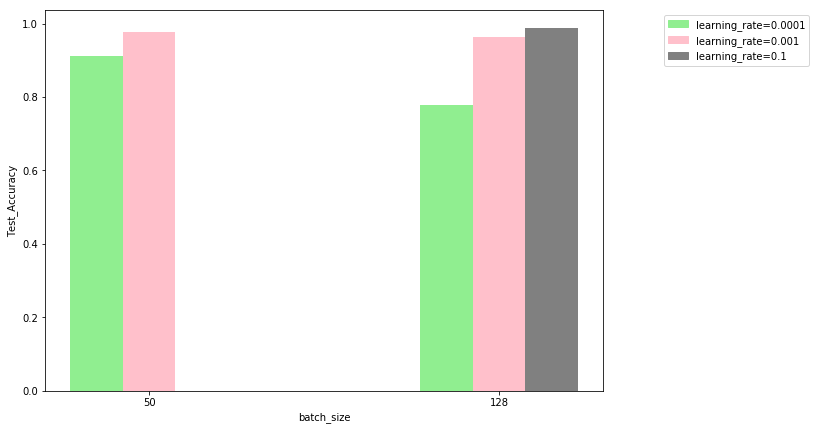

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
plt.figure(figsize=(10,7))
x=np.array([2,3])
y = [0.9104, 0.777]
z=[0.9767,0.9624]
k=[0,0.9865]
plt.xlabel("batch_size")
plt.ylabel("Test_Accuracy")
plt.xticks(x, ["50","128"])
ax = plt.subplot(111)
ax.bar(x-0.15, y,width=0.15,color='lightgreen',align='center')
ax.bar(x, z,width=0.15,color='pink',align='center')
ax.bar(x+0.15, k,width=0.15,color='grey',align='center')

orange_patch = mpatches.Patch(color='lightgreen', label='learning_rate=0.0001')
pink_patch = mpatches.Patch(color='pink', label='learning_rate=0.001')
purple_patch = mpatches.Patch(color='grey', label='learning_rate=0.1')
plt.legend(bbox_to_anchor=(1.1, 1),handles=[orange_patch,pink_patch,purple_patch])


plt.show()

<div class="alert alert-info">  From the graph,we can see the suitable learning rate of SGD Optimizer is 0.1,because we only train for 50 epochs, 0.0001 for learning_rate is not enough.  
</div>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

x = [datetime.datetime(2011, 1, 4, 0, 0),
     datetime.datetime(2011, 1, 5, 0, 0),
     datetime.datetime(2011, 1, 6, 0, 0)]
x = date2num(x)

y = [4, 9, 2]
z=[1,2,3]
k=[11,12,13]

ax = plt.subplot(111)
ax.bar(x-0.2, y,width=0.2,color='b',align='center')
ax.bar(x, z,width=0.2,color='g',align='center')
ax.bar(x+0.2, k,width=0.2,color='r',align='center')
ax.xaxis_date()

plt.show()

<div class="alert alert-info">  learning_rate : 0.0001,batch_size = 50,Optimisateur: AdamOptimizer
</div>

In [5]:
def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
    with tf.name_scope('AdamOptimizer'):
        # Gradient Descent
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model8.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))



        print ("Training Finished!")
learning_rate = 0.0001
batch_size = 50        
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)

Start Training!
Epoch:  01   =====> Loss= 0.788653882   =====> ValidationAccuracy= 0.907999992 0.9076
Epoch:  02   =====> Loss= 0.259509996   =====> ValidationAccuracy= 0.943799973 0.9438
Epoch:  03   =====> Loss= 0.182390966   =====> ValidationAccuracy= 0.961799979 0.9612
Epoch:  04   =====> Loss= 0.138745838   =====> ValidationAccuracy= 0.969399989 0.9692
Epoch:  05   =====> Loss= 0.111887606   =====> ValidationAccuracy= 0.973599970 0.9736
Epoch:  06   =====> Loss= 0.095275814   =====> ValidationAccuracy= 0.977400005 0.977
Epoch:  07   =====> Loss= 0.083563649   =====> ValidationAccuracy= 0.979399979 0.9796
Epoch:  08   =====> Loss= 0.074679092   =====> ValidationAccuracy= 0.982200027 0.9812
Epoch:  09   =====> Loss= 0.067729049   =====> ValidationAccuracy= 0.982800007 0.9836
Epoch:  10   =====> Loss= 0.063098857   =====> ValidationAccuracy= 0.981199980 0.9812
Epoch:  11   =====> Loss= 0.057531422   =====> ValidationAccuracy= 0.984200001 0.9844
Epoch:  12   =====> Loss= 0.054345862  

<div class="alert alert-info">  learning_rate : 0.001,batch_size = 50,Optimisateur: AdamOptimizer
</div>

In [5]:
def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'log_files/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred+1), reduction_indices=1))
    with tf.name_scope('AdamOptimizer'):
        # Gradient Descent
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model9.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))



        print ("Training Finished!")
learning_rate = 0.001
batch_size = 50 
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)

Start Training!
Epoch:  01   =====> Loss= -0.607311315   =====> ValidationAccuracy= 0.952600002 0.9552
Epoch:  02   =====> Loss= -0.666290784   =====> ValidationAccuracy= 0.967800021 0.967
Epoch:  03   =====> Loss= -0.673337347   =====> ValidationAccuracy= 0.979600012 0.9802
Epoch:  04   =====> Loss= -0.677102817   =====> ValidationAccuracy= 0.974200010 0.974
Epoch:  05   =====> Loss= -0.678916298   =====> ValidationAccuracy= 0.982800007 0.9828
Epoch:  06   =====> Loss= -0.681395103   =====> ValidationAccuracy= 0.979600012 0.9794
Epoch:  07   =====> Loss= -0.681984365   =====> ValidationAccuracy= 0.983200014 0.9826
Epoch:  08   =====> Loss= -0.683596877   =====> ValidationAccuracy= 0.985199988 0.9854
Epoch:  09   =====> Loss= -0.683832039   =====> ValidationAccuracy= 0.985599995 0.9854
Epoch:  10   =====> Loss= -0.684560778   =====> ValidationAccuracy= 0.986000001 0.986
Epoch:  11   =====> Loss= -0.684808089   =====> ValidationAccuracy= 0.985599995 0.9856
Epoch:  12   =====> Loss= -0.6

<div class="alert alert-info">  learning_rate : 0.001,batch_size = 128,Optimisateur: AdamOptimizer
</div>

In [5]:
def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred+1), reduction_indices=1))
    with tf.name_scope('AdamOptimizer'):
        # Gradient Descent
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model10.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))



        print ("Training Finished!")
batch_size = 128
learning_rate = 0.001
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)

Start Training!
Epoch:  01   =====> Loss= -0.588140516   =====> ValidationAccuracy= 0.945200026 0.9424
Epoch:  02   =====> Loss= -0.663165015   =====> ValidationAccuracy= 0.969799995 0.9694
Epoch:  03   =====> Loss= -0.671051983   =====> ValidationAccuracy= 0.974600017 0.9736
Epoch:  04   =====> Loss= -0.674510388   =====> ValidationAccuracy= 0.980599999 0.98
Epoch:  05   =====> Loss= -0.677679559   =====> ValidationAccuracy= 0.982400000 0.982
Epoch:  06   =====> Loss= -0.679491726   =====> ValidationAccuracy= 0.980000019 0.9792
Epoch:  07   =====> Loss= -0.680885497   =====> ValidationAccuracy= 0.983399987 0.9834
Epoch:  08   =====> Loss= -0.681832564   =====> ValidationAccuracy= 0.983600020 0.984
Epoch:  09   =====> Loss= -0.682725103   =====> ValidationAccuracy= 0.984200001 0.9838
Epoch:  10   =====> Loss= -0.683655474   =====> ValidationAccuracy= 0.980400026 0.9814
Epoch:  11   =====> Loss= -0.684666123   =====> ValidationAccuracy= 0.986599982 0.9864
Epoch:  12   =====> Loss= -0.68

<div class="alert alert-info">  learning_rate : 0.0001,batch_size = 128,Optimisateur: AdamOptimizer
</div>

In [6]:
def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
    with tf.name_scope('AdamOptimizer'):
        # Gradient Descent
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model11.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))



        print ("Training Finished!")
learning_rate = 0.0001
batch_size = 128
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)

Start Training!
Epoch:  01   =====> Loss= 1.350452773   =====> ValidationAccuracy= 0.856599987 0.8568
Epoch:  02   =====> Loss= 0.387139940   =====> ValidationAccuracy= 0.910799980 0.9114
Epoch:  03   =====> Loss= 0.280666516   =====> ValidationAccuracy= 0.930000007 0.9296
Epoch:  04   =====> Loss= 0.227796367   =====> ValidationAccuracy= 0.943400025 0.9428
Epoch:  05   =====> Loss= 0.190558018   =====> ValidationAccuracy= 0.954400003 0.9538
Epoch:  06   =====> Loss= 0.161712576   =====> ValidationAccuracy= 0.959800005 0.9602
Epoch:  07   =====> Loss= 0.139806602   =====> ValidationAccuracy= 0.966199994 0.9672
Epoch:  08   =====> Loss= 0.123319159   =====> ValidationAccuracy= 0.967800021 0.9684
Epoch:  09   =====> Loss= 0.111005391   =====> ValidationAccuracy= 0.972999990 0.9728
Epoch:  10   =====> Loss= 0.100451524   =====> ValidationAccuracy= 0.975799978 0.9756
Epoch:  11   =====> Loss= 0.093063453   =====> ValidationAccuracy= 0.975600004 0.9766
Epoch:  12   =====> Loss= 0.086705963 

For AdamOptimizer:

| Batch_size &Learning_rate| Test Accuracy |Validation Accuracy | Training Time
| -------------        |: -------------: |: ---------:   
| Batch_size=128 learning_rate=0.0001   |   0.9879     |0.9884 |1079.68809915     
| Batch_size=50  learning_rate=0.0001     |  0.9902        |0.9896|1330.70559716
| Batch_size=128 learning_rate=0.001   |   0.9906      |0.989  | 1191.95677805    
| Batch_size=50  learning_rate=0.001     |  0.9766        |0.9786|1376.96278596 
| Batch_size=128 learning_rate=0.1   |   0.0982      |0.107  | 1051.20988202

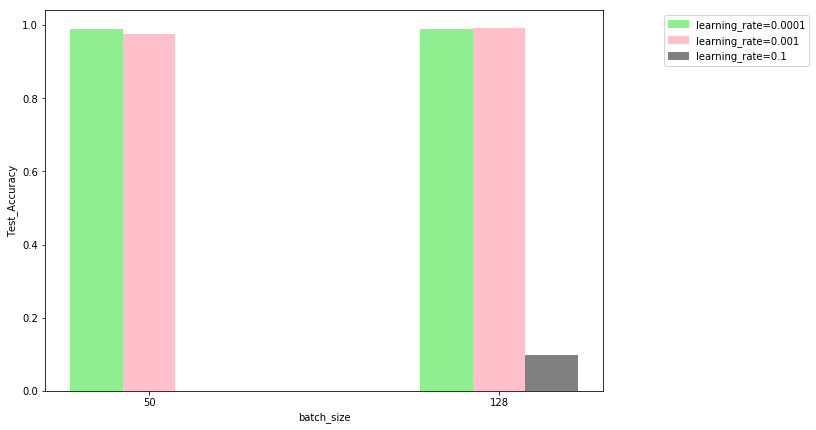

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
plt.figure(figsize=(10,7))
x=np.array([2,3])
y = [0.9902, 0.9879]
z=[0.9766,0.9906]
k=[0,0.0982]
plt.xlabel("batch_size")
plt.ylabel("Test_Accuracy")
plt.xticks(x, ["50","128"])
ax = plt.subplot(111)
ax.bar(x-0.15, y,width=0.15,color='lightgreen',align='center')
ax.bar(x, z,width=0.15,color='pink',align='center')
ax.bar(x+0.15, k,width=0.15,color='grey',align='center')

orange_patch = mpatches.Patch(color='lightgreen', label='learning_rate=0.0001')
pink_patch = mpatches.Patch(color='pink', label='learning_rate=0.001')
purple_patch = mpatches.Patch(color='grey', label='learning_rate=0.1')
plt.legend(bbox_to_anchor=(1.1, 1),handles=[orange_patch,pink_patch,purple_patch])


plt.show()

<div class="alert alert-info">  It's obvious that AdamOptimizer suits lower learning rate, compared with SGD optimizer. When learning rate is 0.1, it's too large for AdamOptimizer, and it can't decrease the loss.  
And different batches have little effect on the result.
</div>

<b> Question 2.2.2 </b>  What about applying a dropout layer on the Fully conntected layer and then retraining the model with the best Optimizer and parameters(Learning rate and Batsh size) obtained in *Question 2.2.1*  ? (probability to keep units=0.75). For this stage ensure that the keep prob is set to 1.0 to evaluate the 
performance of the network including all nodes.

<div class="alert alert-info">  We find that the best model is with learning_rate : 0.0001, batch_size = 50,Optimisateur: AdamOptimizer. So we apply the dropout layer on that model.
</div>

In [5]:
learning_rate = 0.0001
training_epochs = 50
batch_size = 50
display_step = 1
#Your implementation goes here
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
keep_prob = tf.placeholder(tf.float32)

def LeNet5_Model(data):    
    # your inmplementation goes here
    x_image = tf.reshape(data, [-1, 28, 28, 1])
    #layer1
    W_conv1 = weight_variable([5,5,1,6]) # patch 5x5, in size 1, out size 32
    b_conv1 = bias_variable([6])
    conv1 = tf.nn.conv2d(x_image,W_conv1,strides = [1,1,1,1],padding='SAME')
    pool1=tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    output1=tf.nn.relu(pool1+b_conv1)
    #layer2
    W_conv2 = weight_variable([5,5,6,16]) # patch 5x5, in size 32, out size 64
    b_conv2 = bias_variable([16])
    conv2 = tf.nn.conv2d(output1,W_conv2,strides = [1,1,1,1],padding='VALID')
    pool2=tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    output2=tf.nn.relu(pool2+b_conv2)
    #layer3
    flat3=tf.contrib.layers.flatten(output2)
    W1 = weight_variable([400,120])
    b1 = bias_variable([120])
    y1 = tf.nn.relu(tf.matmul(flat3, W1) + b1)
    y1_drop = tf.nn.dropout(y1, keep_prob)
    #layer4
    W2 = weight_variable([120, 84])
    b2 = bias_variable([84])
    y2 = tf.nn.relu(tf.matmul(y1_drop, W2) + b2)
    y2_drop = tf.nn.dropout(y2, keep_prob)
    #layer5
    W3 = weight_variable([84, 10])
    b3 = bias_variable([10])
    model = tf.nn.softmax(tf.matmul(y2_drop, W3) + b3)
    return model 
from __future__ import print_function
from sklearn.utils import shuffle
# Initializing the variables
def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
    with tf.name_scope('AdamOptimizer'):
        # Gradient Descent
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.75})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels, keep_prob: 1})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels,keep_prob: 1}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model12.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels, keep_prob: 1}))



        print ("Training Finished!")
        
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)


Start Training!
Epoch:  01   =====> Loss= 1.075224498   =====> ValidationAccuracy= 0.908999979 0.9092
Epoch:  02   =====> Loss= 0.359597699   =====> ValidationAccuracy= 0.944400012 0.9444
Epoch:  03   =====> Loss= 0.249247027   =====> ValidationAccuracy= 0.962599993 0.9624
Epoch:  04   =====> Loss= 0.193789909   =====> ValidationAccuracy= 0.969399989 0.9692
Epoch:  05   =====> Loss= 0.159239857   =====> ValidationAccuracy= 0.972999990 0.9726
Epoch:  06   =====> Loss= 0.137381346   =====> ValidationAccuracy= 0.975600004 0.9754
Epoch:  07   =====> Loss= 0.124127876   =====> ValidationAccuracy= 0.978600025 0.9788
Epoch:  08   =====> Loss= 0.111954746   =====> ValidationAccuracy= 0.980799973 0.981
Epoch:  09   =====> Loss= 0.100889799   =====> ValidationAccuracy= 0.982800007 0.983
Epoch:  10   =====> Loss= 0.093859264   =====> ValidationAccuracy= 0.984399974 0.9844
Epoch:  11   =====> Loss= 0.087610445   =====> ValidationAccuracy= 0.984200001 0.9844
Epoch:  12   =====> Loss= 0.081095782   

<div class="alert alert-info">  We also find the result with learning_rate = 0.001, batch_size = 128,AdamOptimizer, is also good, so we apply the dropout on this model too. 
</div>

In [4]:
learning_rate = 0.001
training_epochs = 50
batch_size = 128
display_step = 1
#Your implementation goes here
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
keep_prob = tf.placeholder(tf.float32)

def LeNet5_Model(data):    
    # your inmplementation goes here
    x_image = tf.reshape(data, [-1, 28, 28, 1])
    #layer1
    W_conv1 = weight_variable([5,5,1,6]) # patch 5x5, in size 1, out size 32
    b_conv1 = bias_variable([6])
    conv1 = tf.nn.conv2d(x_image,W_conv1,strides = [1,1,1,1],padding='SAME')
    pool1=tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    output1=tf.nn.relu(pool1+b_conv1)
    #layer2
    W_conv2 = weight_variable([5,5,6,16]) # patch 5x5, in size 32, out size 64
    b_conv2 = bias_variable([16])
    conv2 = tf.nn.conv2d(output1,W_conv2,strides = [1,1,1,1],padding='VALID')
    pool2=tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    output2=tf.nn.relu(pool2+b_conv2)
    #layer3
    flat3=tf.contrib.layers.flatten(output2)
    W1 = weight_variable([400,120])
    b1 = bias_variable([120])
    y1 = tf.nn.relu(tf.matmul(flat3, W1) + b1)
    y1_drop = tf.nn.dropout(y1, keep_prob)
    #layer4
    W2 = weight_variable([120, 84])
    b2 = bias_variable([84])
    y2 = tf.nn.relu(tf.matmul(y1_drop, W2) + b2)
    y2_drop = tf.nn.dropout(y2, keep_prob)
    #layer5
    W3 = weight_variable([84, 10])
    b3 = bias_variable([10])
    model = tf.nn.softmax(tf.matmul(y2_drop, W3) + b3)
    return model 
from __future__ import print_function
from sklearn.utils import shuffle
# Initializing the variables
def train():
    # Initializing the session 
    print ("Start Training!")
    #Your implementation goes here
    #STEP 1
    logs_path = 'hao/'  # useful for tensorboard
    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred+1), reduction_indices=1))
    with tf.name_scope('AdamOptimizer'):
        # Gradient Descent
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    saver = tf.train.Saver()


    #STEP 2 


    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            shuffle(mnist.train.images, mnist.train.labels)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.75})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch 
            _, v, summary = sess.run([optimizer, acc, merged_summary_op],
                                     feed_dict={x: mnist.validation.images, y: mnist.validation.labels, keep_prob: 1})
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost),
                      "  =====> ValidationAccuracy=", "{:.9f}". format(v),
                      acc.eval({x: mnist.validation.images, y: mnist.validation.labels,keep_prob: 1}))
        print("Optimization Finished!")
        # Save model
        saver.save(sess, "/notebooks/hao/TP2/model12.ckpt")
        # Test model
        # Calculate accuracy
        print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels, keep_prob: 1}))



        print ("Training Finished!")
        
import time
begintime=time.time()
train()
endtime=time.time()
print ("totaltime:",endtime-begintime)


Start Training!
Epoch:  01   =====> Loss= -0.552915982   =====> ValidationAccuracy= 0.952000022 0.9528
Epoch:  02   =====> Loss= -0.655489608   =====> ValidationAccuracy= 0.973200023 0.9732
Epoch:  03   =====> Loss= -0.666042951   =====> ValidationAccuracy= 0.976199985 0.9764
Epoch:  04   =====> Loss= -0.670623133   =====> ValidationAccuracy= 0.979600012 0.9788
Epoch:  05   =====> Loss= -0.673720338   =====> ValidationAccuracy= 0.982400000 0.982
Epoch:  06   =====> Loss= -0.675854702   =====> ValidationAccuracy= 0.983200014 0.983
Epoch:  07   =====> Loss= -0.677342409   =====> ValidationAccuracy= 0.986000001 0.9872
Epoch:  08   =====> Loss= -0.679147633   =====> ValidationAccuracy= 0.984200001 0.9844
Epoch:  09   =====> Loss= -0.679643976   =====> ValidationAccuracy= 0.987800002 0.9874
Epoch:  10   =====> Loss= -0.680197981   =====> ValidationAccuracy= 0.986999989 0.987
Epoch:  11   =====> Loss= -0.681504203   =====> ValidationAccuracy= 0.988799989 0.9892
Epoch:  12   =====> Loss= -0.6

<div class="alert alert-info">  Compare these two models, we can see the test accuracy is the same, and the validation accuracy is similar.Both models are good.  
While, because the learning rate of the second model is high, so the second model begins with a relatively high accuracy, and has shorter training time.
</div>

<div class="alert alert-info">  We also discover Relu activation function begins with higher accuracy than sigmoid.
And because we train the model with cross entropy,and the **pred** can be very closed to 0, which will genegrate **"nan"**,and it will blind the optimizer, make the accuracy not correct anymore, so we cast the **pred** to (1,inf).
</div>